In [1]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

# 클래스 - encoding 변환 함수
def get_convert(class_dir='./open/classes.txt'):
    f = open(class_dir, 'r')
    lines = [list(line.strip().split(',')) for line in f.readlines()]
    f.close()

    encode = {}
    decode = {}
    for cls_num, cls_name in lines:
        encode[int(cls_num)] = cls_name
        decode[cls_name] = int(cls_num)
    
    return encode, decode

# 클래스 - 색상 변환
palette = [(220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
         (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
         (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42), 
         (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157), 
         (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
         (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176), (255, 99, 164),
         (92, 0, 73), (133, 129, 255), (78, 180, 255), (0, 228, 0)]

encode, decode = get_convert()

print(list(decode.keys()))

['chevrolet_malibu_sedan_2012_2016', 'chevrolet_malibu_sedan_2017_2019', 'chevrolet_spark_hatchback_2016_2021', 'chevrolet_trailblazer_suv_2021_', 'chevrolet_trax_suv_2017_2019', 'genesis_g80_sedan_2016_2020', 'genesis_g80_sedan_2021_', 'genesis_gv80_suv_2020_', 'hyundai_avante_sedan_2011_2015', 'hyundai_avante_sedan_2020_', 'hyundai_grandeur_sedan_2011_2016', 'hyundai_grandstarex_van_2018_2020', 'hyundai_ioniq_hatchback_2016_2019', 'hyundai_sonata_sedan_2004_2009', 'hyundai_sonata_sedan_2010_2014', 'hyundai_sonata_sedan_2019_2020', 'kia_carnival_van_2015_2020', 'kia_carnival_van_2021_', 'kia_k5_sedan_2010_2015', 'kia_k5_sedan_2020_', 'kia_k7_sedan_2016_2020', 'kia_mohave_suv_2020_', 'kia_morning_hatchback_2004_2010', 'kia_morning_hatchback_2011_2016', 'kia_ray_hatchback_2012_2017', 'kia_sorrento_suv_2015_2019', 'kia_sorrento_suv_2020_', 'kia_soul_suv_2014_2018', 'kia_sportage_suv_2016_2020', 'kia_stonic_suv_2017_2019', 'renault_sm3_sedan_2015_2018', 'renault_xm3_suv_2020_', 'ssangyong

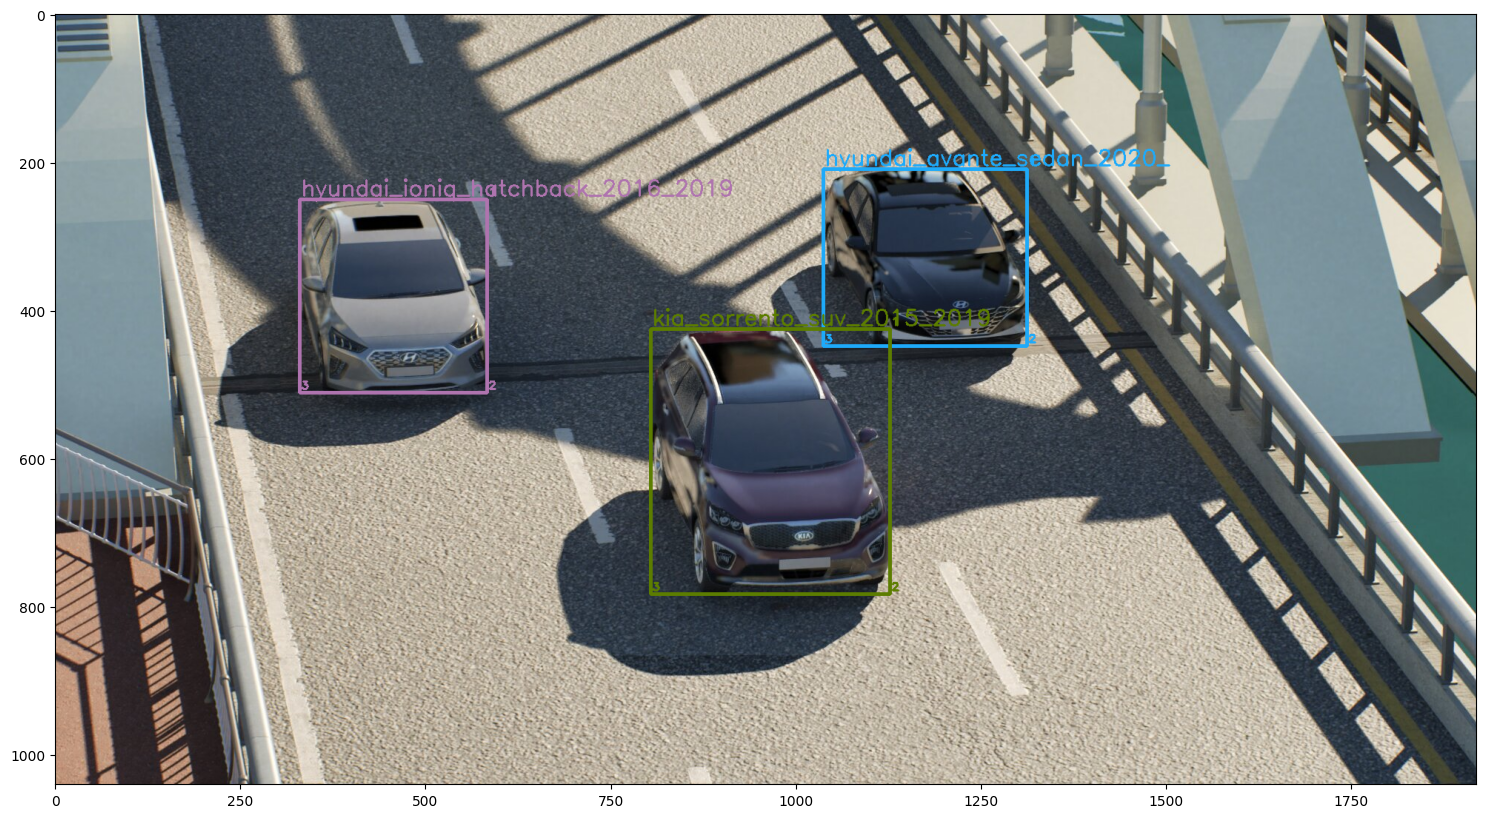

In [2]:
# 이미지와 bbox 확인
def viz(image_name='syn_00000.png', base_dir='./open/train', axis='on'):
    name, ext = image_name.split('.')
    image_path = os.path.join(base_dir, image_name)
    anno_path = os.path.join(base_dir, name+'.txt')
    assert glob.glob(image_path), 'image not found'
    assert glob.glob(anno_path), 'annotation not found'

    anno_file = open(anno_path, 'r')
    anno_lines = [list(map(float, line.strip().split())) for line in anno_file.readlines()]
    anno_file.close()

    image = cv2.imread(image_path)
    for line in anno_lines:
        cls, x1, y1, x2, y2, x3, y3, x4, y4 = map(int, line)
        pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)

        # bbox 표시
        image = cv2.polylines(image, [pts], True, palette[cls], 3)

        # 좌표 순서 표시
        cv2.putText(image,"1",(pts[1][0]+2,pts[1][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, palette[cls], 2)
        cv2.putText(image,"2",(pts[2][0]+2,pts[2][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, palette[cls], 2)
        cv2.putText(image,"3",(pts[3][0]+2,pts[3][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, palette[cls], 2)
        
        # 클래스명 표시
        cv2.putText(image,encode[cls],(pts[0][0]+2,pts[0][1]-5), cv2.FONT_HERSHEY_SIMPLEX, 1, palette[cls], 2)
        

    fig, axes = plt.subplots(1, figsize=(20, 10))

    axes.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes.axis(axis)

viz()

100%|██████████| 6481/6481 [00:01<00:00, 4689.95it/s]


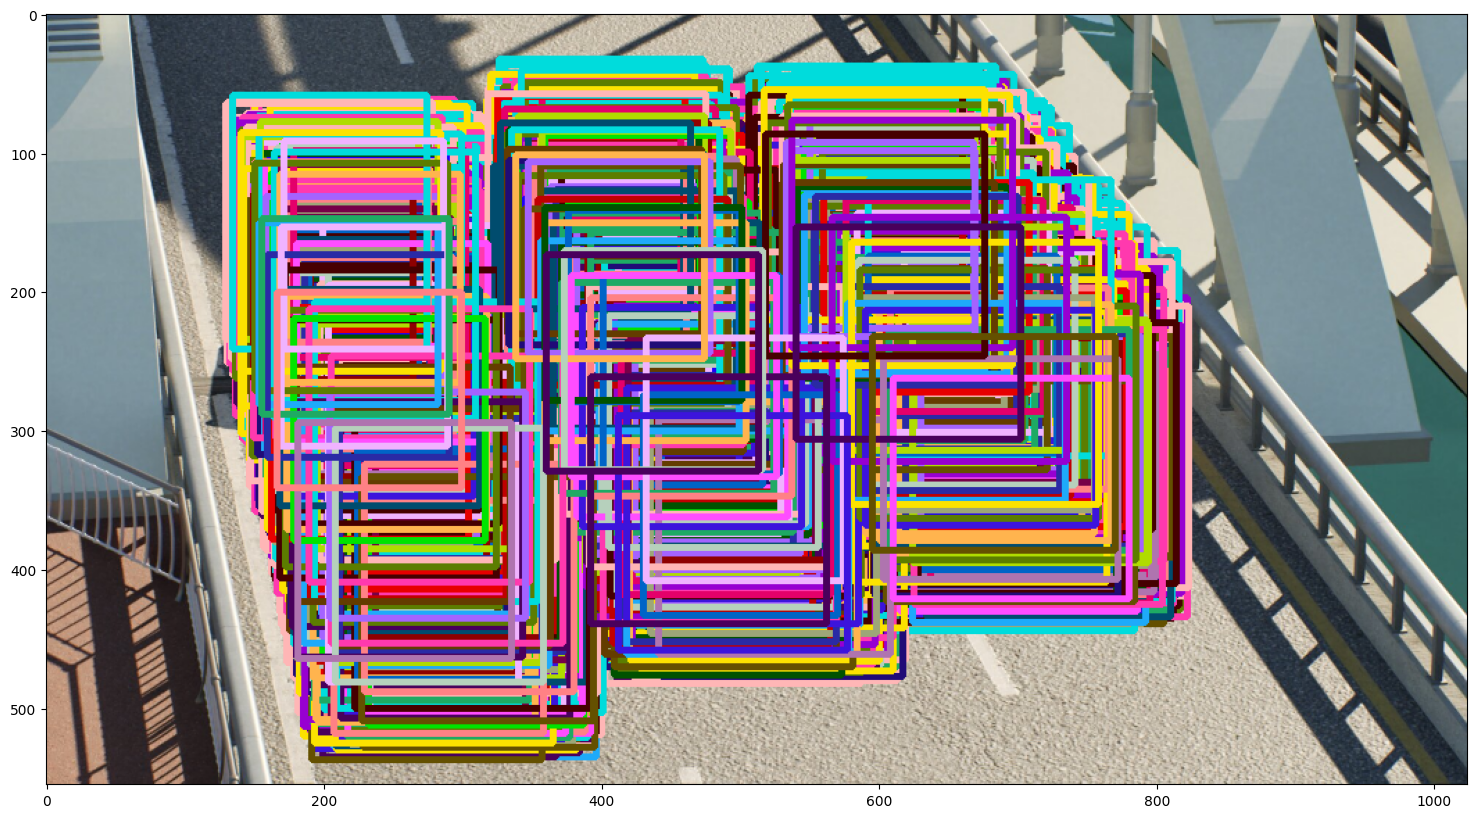

In [3]:
# 전체 bbox 확인
def viz(image_name='syn_00000.png', base_dir='./new_open/train', axis='on'):
    image = cv2.imread(os.path.join(base_dir, image_name))
    for image_path in tqdm(glob.glob(os.path.join(base_dir, '*.png')),total=len(glob.glob(os.path.join(base_dir, '*.png')))):
        
        anno_path = image_path.replace('.png', '.txt')
        assert glob.glob(image_path), 'image not found'
        assert glob.glob(anno_path), 'annotation not found'

        anno_file = open(anno_path, 'r')
        anno_lines = [list(map(float, line.strip().split())) for line in anno_file.readlines()]
        anno_file.close()

        for line in anno_lines:
            cls, x1, y1, x2, y2, x3, y3, x4, y4 = map(int, line)
            pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)

            # bbox 표시
            image = cv2.polylines(image, [pts], True, palette[cls], 3)

            

    fig, axes = plt.subplots(1, figsize=(20, 10))

    axes.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes.axis(axis)

viz()

In [4]:
# bbox 정보 모으기

#anno_dict = defaultdict(list)
ratios = defaultdict(list)
areas = defaultdict(list)
centers = defaultdict(list)
widths = defaultdict(list)
heights = defaultdict(list)

anno_paths = glob.glob('./open/train/*.txt')
for anno_path in anno_paths:
    anno_file = open(anno_path, 'r')
    anno_lines = [list(map(float, line.strip().split())) for line in anno_file.readlines()]
    anno_file.close()

    for line in anno_lines:
        cls, xmin, ymin, _, _, xmax, ymax, _, _, = map(int, line)
        w = xmax - xmin
        h = ymax - ymin
        ratio = h / w # h / w
        area = w * h
        center = ((xmax + xmin) // 2, (ymax + ymin) // 2)
        #anno_dict[encode[cls]].append([ratio, area, center])
        widths[encode[cls]].append(w)
        heights[encode[cls]].append(h)
        ratios[encode[cls]].append(ratio)
        areas[encode[cls]].append(area)
        centers[encode[cls]].append(center)

        
    

In [5]:
# 클래스별 ratio, area 최소, 최대값 dict 생성
ratio_minmax = defaultdict(dict)
for k,v in ratios.items():
    # print(k, round(min(v),2), round(max(v),2))
    ratio_minmax[k]['min'] = round(min(v),2)
    ratio_minmax[k]['max'] = round(max(v),2)

area_minmax = defaultdict(dict)
for k,v in areas.items():
    # print(k, round(min(v),2), round(max(v),2))
    area_minmax[k]['min'] = round(min(v),2)
    area_minmax[k]['max'] = round(max(v),2)

In [13]:
############ post-process 1: 크기나 비율이 안 맞는 좌표의 conf 줄이기 ############
dir = './final/wbf230619_095632.csv'

pred_df = pd.read_csv(dir)

for i in range(len(pred_df)):
    class_id = pred_df.loc[i, 'class_id']
    confidence = pred_df.loc[i, 'confidence']
    cls = encode[class_id]
    x1 = pred_df.loc[i, 'point1_x']
    y1 = pred_df.loc[i, 'point1_y']
    x3 = pred_df.loc[i, 'point3_x']
    y3 = pred_df.loc[i, 'point3_y']
    area = (x3-x1)*(y3-y1)
    ratio = (y3-y1)/(x3-x1)

    weight = 0.1
    rmn = ratio_minmax[cls]['min'] * (1-weight)
    rmx = ratio_minmax[cls]['max'] + (1+weight)
    weight = 0.2
    amn = area_minmax[cls]['min'] * (1-weight)
    amx = area_minmax[cls]['max'] + (1+weight)

    if ratio < rmn or ratio > rmx:
        confidence /= 2
    if area < amn or area > amx:
        confidence /= 2
    
    confidence = round(confidence, 5)

    pred_df.loc[i, 'confidence'] = confidence

pred_df.to_csv(dir.replace('.csv','_conf.csv'), index=False)

    

In [16]:
############ new post processing ############
# wbf 변형
# 1. 여러 모델 예측을 list에 모아서 iou 높은 순으로 정렬
# 2. iou 높은 순으로 bbox 하나씩 선택해 나머지 박스들 중 iou가 0.5 이상인 박스들 모두 추출해 List에서 제거
# 3-1. 선택된 박스들의 좌표들의 평균값으로 새로운 박스 생성
# 3-2. 선택된 박스들의 클래스별로 conf 값 평균으로 새로운 박스의 conf 값 생성
# * 기대효과 = 여러 개의 클래스로 예측된 박스의 경우 conf를 1/n으로 낮출 수 있고 box 좌표도 평균으로 보정 가능
import os
import glob
from post import *
import numpy as np
from collections import defaultdict

csv_names = [
    '0615.csv',
    'wbf_0616.csv',
]
base_dir = './results'
image_dirs = glob.glob('./open/test/*.png')
image_names = [dir.split('/')[-1] for dir in image_dirs]
model_num = len(csv_names)
csv_dirs = [os.path.join(base_dir, csv_name) for csv_name in csv_names]

# 이미지별 예측 모으기
pred_dict = defaultdict(list)
for csv_dir in csv_dirs:
    df = pd.read_csv(csv_dir)
    df = df.sort_values(by=['file_name', 'confidence'], ascending=[True, False])
    df = df.reset_index(drop=True)
    for i in range(len(df)):
        file_name = df.loc[i, 'file_name']
        class_id = df.loc[i, 'class_id']
        confidence = df.loc[i, 'confidence']
        point1_x = df.loc[i, 'point1_x']
        point1_y = df.loc[i, 'point1_y']
        point2_x = df.loc[i, 'point2_x']
        point2_y = df.loc[i, 'point2_y']
        point3_x = df.loc[i, 'point3_x']
        point3_y = df.loc[i, 'point3_y']
        point4_x = df.loc[i, 'point4_x']
        point4_y = df.loc[i, 'point4_y']

        pred_dict[file_name].append([class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y])

# 이미지별 예측 정렬
for k,v in pred_dict.items():
    pred_dict[k] = sorted(v, key=lambda x: x[1], reverse=True)


def post_process(bboxes, iou_thr, conf_thr, model_num=2):
    # confidence thr 이하인 bbox 제거
    bboxes = [bbox for bbox in bboxes if bbox[1] > conf_thr]
    # confidence 오른순으로 정렬(뒤에서부터 pop하기 위해)
    bboxes = sorted(bboxes, key=lambda x: x[1])

    result = []
    while bboxes:
        target_bbox = bboxes.pop()
        temp = [target_bbox.copy()]
        for bbox in bboxes:
            if iou(target_bbox, bbox) > iou_thr:
                temp.append(bbox)
                bboxes.remove(bbox)
        # 여러 bbox가 iou_thr 이상 겹칠 경우 평균값으로 새로운 bbox 생성
        temp_dict = defaultdict(list)
        for t in temp:
            temp_dict[t[0]].append(t[:])

        for class_id,infos in temp_dict.items():
            if len(infos) > 1:
                # confidence를 len(v)로 나눠서 낮춤
                for i in range(len(infos)):
                    infos[i][1] = len(temp_dict.keys()) * infos[i][1] / model_num

                temp_dict[class_id] = np.mean(infos, axis=0)
            else:
                temp_dict[class_id] = infos[0]
        
        # 새로운 bbox들을 result에 추가
        for class_id,infos in temp_dict.items():
            result.append(infos)

    # 다시 confidence 내림순으로 정렬
    result = sorted(result, key=lambda x: x[1], reverse=True)
    
    return result


# 이미지별 예측 후처리
result_dict = defaultdict(list)
for file_name,infos in pred_dict.items():
    result = post_process(infos, iou_thr=0.5, conf_thr=0.000005, model_num=model_num)
    result_dict[file_name] = result


# result_dict로 df 생성
df = []
for file_name, infos in result_dict.items():
    for info in infos:
        class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y = info
        df.append({
            'file_name': file_name,
            'class_id': int(class_id),
            'confidence': round(confidence, 5),
            'point1_x': int(point1_x),
            'point1_y': int(point1_y),
            'point2_x': int(point2_x),
            'point2_y': int(point2_y),
            'point3_x': int(point3_x),
            'point3_y': int(point3_y),
            'point4_x': int(point4_x),
            'point4_y': int(point4_y),
        })

df = pd.DataFrame(df)
df = df.sort_values(by=['file_name', 'confidence'], ascending=[True, False])
df = df.reset_index(drop=True)
df.to_csv('./results/0616_post_test.csv', index=False)
df


,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,064442001.png,16,0.76442,1138,181,1429,181,1429,497,1138,497
1,064442001.png,11,0.17974,0,0,112,0,112,112,0,112
2,064442001.png,2,0.10648,1138,181,1429,181,1429,497,1138,497
3,064442001.png,24,0.10102,1138,181,1429,181,1429,497,1138,497
4,064442001.png,24,0.07505,0,0,113,0,113,113,0,113
...,...,...,...,...,...,...,...,...,...,...,...
21093,183928410.png,7,0.02262,0,0,97,0,97,83,0,83
21094,183928410.png,33,0.00044,934,0,1192,0,1192,108,934,108
21095,184121675.png,27,0.91472,877,555,1149,555,1149,859,877,859
21096,184121675.png,2,0.06292,878,556,1149,556,1149,859,878,859


kia_sorrento_suv_2015_2019 74844 120414
chevrolet_malibu_sedan_2012_2016 60264 101738
chevrolet_spark_hatchback_2016_2021 52272 82362
kia_morning_hatchback_2004_2010 51906 82737
kia_k5_sedan_2010_2015 60009 101100
renault_xm3_suv_2020_ 55671 89804
hyundai_sonata_sedan_2010_2014 57270 94004
hyundai_avante_sedan_2011_2015 56160 93024
chevrolet_malibu_sedan_2017_2019 64260 106785
ssangyong_tivoli_suv_2016_2020 61512 99470
kia_carnival_van_2021_ 88086 142002
genesis_g80_sedan_2016_2020 62965 105301
hyundai_grandstarex_van_2018_2020 90472 143000
kia_morning_hatchback_2011_2016 51465 82582
genesis_g80_sedan_2021_ 64262 105481
kia_sorrento_suv_2020_ 79254 126338
kia_ray_hatchback_2012_2017 60543 93545
kia_k5_sedan_2020_ 60264 100200
hyundai_avante_sedan_2020_ 56406 95904
hyundai_sonata_sedan_2019_2020 59048 99532
kia_stonic_suv_2017_2019 57912 91000
hyundai_grandeur_sedan_2011_2016 61985 101738
kia_sportage_suv_2016_2020 65212 105492
kia_k7_sedan_2016_2020 62952 104492
kia_mohave_suv_2020_ 82

(array([14., 41., 43., 40., 25.,  3.,  0.,  2., 17., 59., 60., 26.,  4.,
         0.,  0.,  0.,  8., 52., 80., 26.]),
 array([0.72789116, 0.73567274, 0.74345431, 0.75123589, 0.75901747,
        0.76679905, 0.77458063, 0.78236221, 0.79014378, 0.79792536,
        0.80570694, 0.81348852, 0.8212701 , 0.82905168, 0.83683326,
        0.84461483, 0.85239641, 0.86017799, 0.86795957, 0.87574115,
        0.88352273]),
 <BarContainer object of 20 artists>)

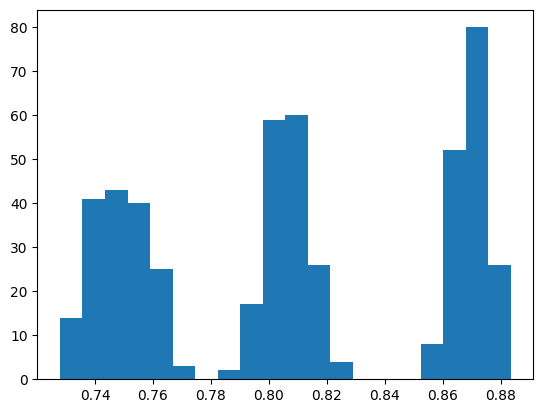

In [5]:
plt.hist(ratios['hyundai_grandstarex_van_2018_2020'], bins=20)

(array([ 8., 24., 37., 44., 37., 20.,  2.,  0., 10., 34., 55., 36., 21.,
         2.,  0.,  0., 20., 67., 67., 16.]),
 array([0.82063882, 0.82944915, 0.83825948, 0.84706981, 0.85588014,
        0.86469047, 0.8735008 , 0.88231113, 0.89112146, 0.89993179,
        0.90874212, 0.91755245, 0.92636278, 0.93517311, 0.94398344,
        0.95279377, 0.9616041 , 0.97041444, 0.97922477, 0.9880351 ,
        0.99684543]),
 <BarContainer object of 20 artists>)

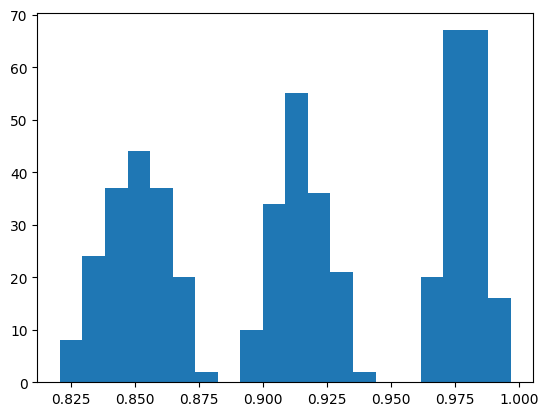

In [6]:
plt.hist(ratios['kia_carnival_van_2021_'], bins=20)

(array([20., 13., 13., 23., 33., 25., 31., 35., 40., 36., 38., 34., 30.,
        35., 21., 18., 24., 12., 11.,  8.]),
 array([277.  , 281.65, 286.3 , 290.95, 295.6 , 300.25, 304.9 , 309.55,
        314.2 , 318.85, 323.5 , 328.15, 332.8 , 337.45, 342.1 , 346.75,
        351.4 , 356.05, 360.7 , 365.35, 370.  ]),
 <BarContainer object of 20 artists>)

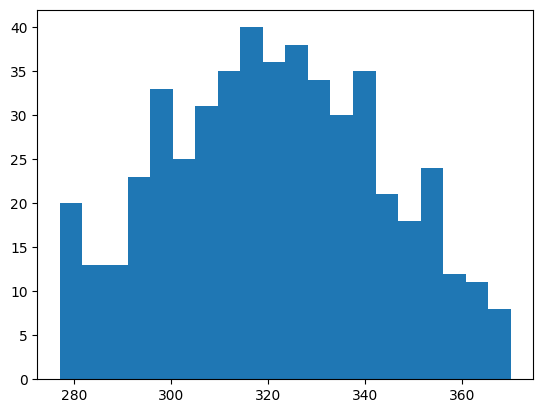

In [7]:
plt.hist(widths['kia_carnival_van_2021_'], bins=20)

(array([21., 40., 38., 34., 23., 28., 42., 32., 42., 33., 23., 34., 33.,
        18., 10., 16., 13.,  6.,  8.,  6.]),
 array([311.  , 316.15, 321.3 , 326.45, 331.6 , 336.75, 341.9 , 347.05,
        352.2 , 357.35, 362.5 , 367.65, 372.8 , 377.95, 383.1 , 388.25,
        393.4 , 398.55, 403.7 , 408.85, 414.  ]),
 <BarContainer object of 20 artists>)

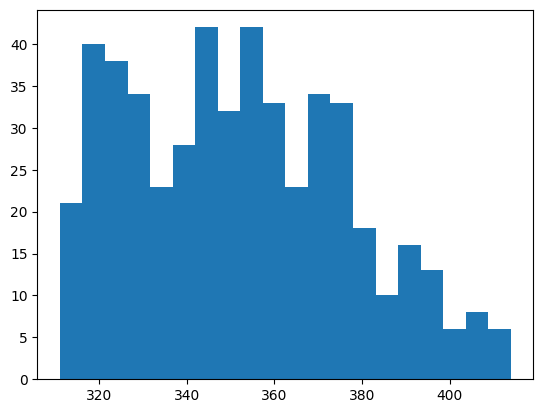

In [8]:
plt.hist(heights['kia_carnival_van_2021_'], bins=20)

In [1]:
import cv2
import numpy as np
import glob

# mean, std 계산
image_paths = glob.glob('./open/train/*.png')


img_norm = list()
img_std = list()
for data in image_paths:
    img = cv2.imread(data, cv2.IMREAD_COLOR).astype(np.float32)/255.0
    if len(img.shape) < 2: # 흑백 이미지는 제외
        continue
    mean,std = np.mean(img, axis=(0,1)), np.std(img, axis=(0,1))
    img_norm.append(mean)
    img_std.append(std)

print(np.mean(img_norm, axis=0), np.mean(img_std, axis=0))
# 결과: [105.838425, 110.629074, 111.49401 ], [46.502304, 54.21968 , 59.66474 ]